In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2022-08-23 18:15:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2022-08-23 18:15:05 (6.01 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [ ]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


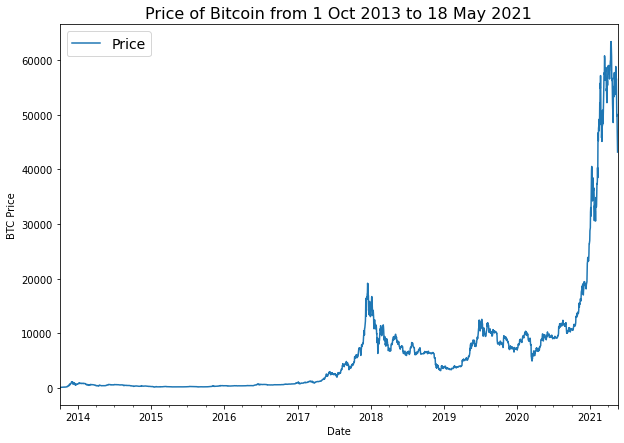

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

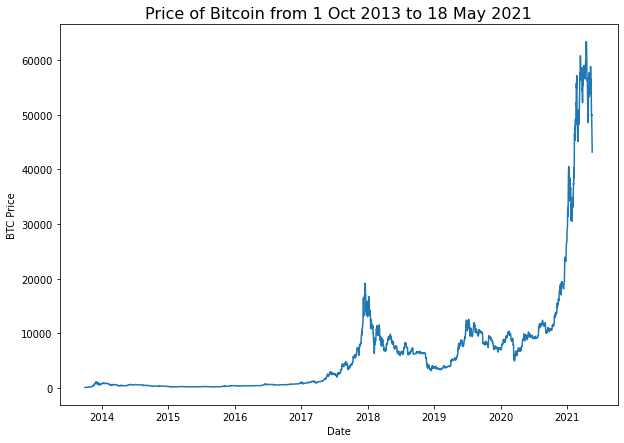

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [ ]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

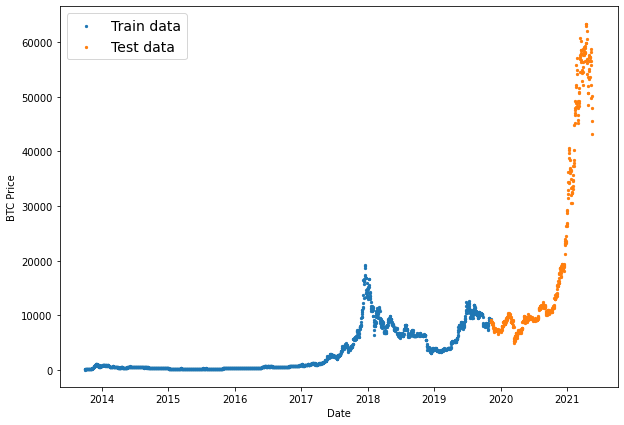

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
naive_forecast=y_test[:-1]
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [ ]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

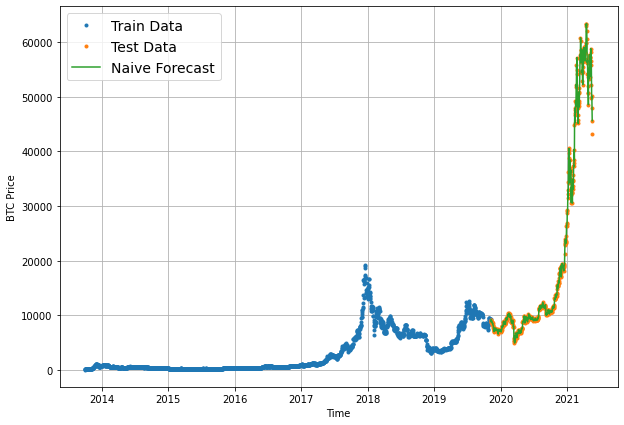

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label='Train Data')
plot_time_series(timesteps=X_test,values=y_test,label='Test Data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast,format='-', label='Naive Forecast')

In [ ]:
import tensorflow as tf


In [ ]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
print(f'We want to predict {btc_price[7]} using {btc_price[:7]}')

We want to predict 123.033 using [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795]


In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
def get_labelled_window(x,horizon=HORIZON):
  return x[:,:-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label= get_labelled_window(tf.expand_dims(tf.range(8), axis=0),horizon=HORIZON)

In [ ]:
print(f'Window:{tf.squeeze(test_window)} --> Horizon:{tf.squeeze(test_label)}')

Window:[0 1 2 3 4 5 6] --> Horizon:7


In [ ]:
import numpy as np
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step=np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  print(f'Window indexes:\n{window_indexes}')
  windowed_array=x[window_indexes]
  windows, labels= get_labelled_window(x=windowed_array,horizon=HORIZON)
  return windows, labels

In [ ]:
full_windows, full_labels=make_windows(x=prices, window_size=WINDOW_SIZE, horizon=HORIZON)

Window indexes:
[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]]


In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
import tensorflow as tf

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [ ]:
train_windows,test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
len( test_windows)

556

In [ ]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [ ]:
train_labels[:-HORIZON-1].shape

(2222, 1)

In [ ]:
train_labels.shape

(2224, 1)

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

In [ ]:

y_train[WINDOW_SIZE:].shape

(2222,)

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [ ]:
import os

In [ ]:
def create_model_checkpoint(model_name, save_path='Model Experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [ ]:

model_1=tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

In [ ]:
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

In [ ]:
train_windows.shape

(2224, 7)

In [ ]:
           model_1.fit(x=train_windows,
                       y=train_labels,
                       verbose=1,
                       epochs=100,
                       batch_size=128,
                       validation_data=(test_windows, test_labels),
                       callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 39ms/step - loss: 1290.8722 - mae: 1290.8722 - mse: 5569510.0000 - val_loss: 2358.3687 - val_mae: 2358.3687 - val_mse: 13306239.0000
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 350.0674 - mae: 350.0674 - mse: 498049.9688 - val_loss: 1715.5450 - val_mae: 1715.5450 - val_mse: 6910793.0000
Epoch 3/100
18/18 [==============================] - 1s 34ms/step - loss: 203.3290 - mae: 203.3290 - mse: 188510.7188 - val_loss: 1122.0137 - val_mae: 1122.0137 - val_mse: 3524355.5000
Epoch 4/100
18/18 [==============================] - 1s 46ms/step - loss: 172.7943 - mae: 172.7943 - mse: 156841.3125 - val_loss: 966.4976 - val_mae: 966.4976 - val_mse: 2956484.2500
Epoch 5/100
18/18 [==============================] - 1s 33ms/step - loss: 164.7179 - mae: 164.7179 - mse: 146022.0469 - val_loss: 957.1722 - val_mae: 957.1722 - val_mse: 2842847.2500
Epoch 6/100
18/18 [==============================] - 1s 30ms/step - loss: 1

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 616.3392 - mae: 616.3392 - mse: 1253439.2500


[616.3392333984375, 616.3392333984375, 1253439.25]

In [ ]:
model_1=tf.keras.models.load_model('/content/Model Experiments/model_1_dense')

In [ ]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 566.3733 - mae: 566.3733 - mse: 1167176.0000


[566.373291015625, 566.373291015625, 1167176.0]

In [ ]:
def make_preds(model, input_data):
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds=make_preds(model_1, test_windows)

In [ ]:
model_1_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_1_preds)

In [ ]:
model_1_results

{'mae': 566.3734,
 'mse': 1167176.1,
 'rmse': 1080.3593,
 'mape': 2.5436194,
 'mase': 0.9949612}

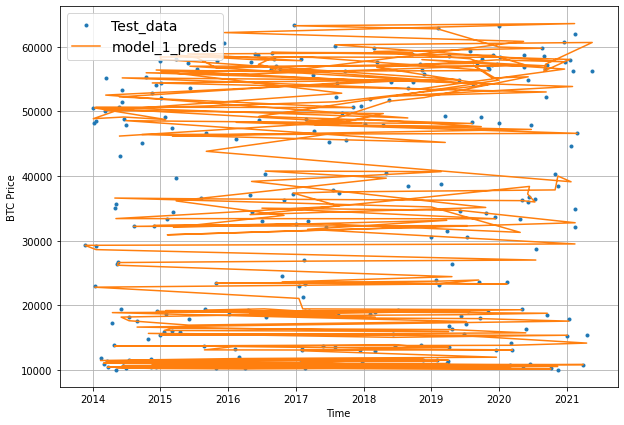

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [ ]:
HORIZON=1
WINDOW_SIZE=30

In [ ]:
full_windows, full_labels=make_windows(prices, horizon=HORIZON, window_size=WINDOW_SIZE)

Window indexes:
[[   0    1    2 ...   28   29   30]
 [   1    2    3 ...   29   30   31]
 [   2    3    4 ...   30   31   32]
 ...
 [2754 2755 2756 ... 2782 2783 2784]
 [2755 2756 2757 ... 2783 2784 2785]
 [2756 2757 2758 ... 2784 2785 2786]]


In [ ]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)

In [ ]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON) 
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 34ms/step - loss: 1097.0364 - val_loss: 3900.4734
Epoch 2/100
18/18 [==============================] - 1s 44ms/step - loss: 428.0718 - val_loss: 1586.9788
Epoch 3/100
18/18 [==============================] - 1s 31ms/step - loss: 279.7651 - val_loss: 1220.5885
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 224.3577 - val_loss: 1160.8899
Epoch 5/100
18/18 [==============================] - 1s 31ms/step - loss: 187.9847 - val_loss: 1008.5139
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 182.9360 - val_loss: 1034.0234
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 193.5136 - val_loss: 1052.5927
Epoch 8/100
18/18 [==============================] - 1s 31ms/step - loss: 189.6134 - val_loss: 981.0544
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 164.6297 - val_loss: 982.6329
Epoch 10/100
18/18 [==============================] - 1s 30

In [ ]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 658.0289


658.0288696289062

In [ ]:
model_2=tf.keras.models.load_model('/content/Model Experiments/model_2_dense')

In [ ]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.8480


608.8480224609375

In [ ]:
model_2_preds=make_preds(model=model_2,
                         input_data=test_windows)

In [ ]:
model_2_preds

<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 8903.553 ,  8932.773 ,  8792.956 ,  8590.411 ,  8454.575 ,
        8345.147 ,  8289.815 ,  8157.128 ,  8205.852 ,  7836.6006,
        7359.5312,  7236.5586,  7111.8867,  7111.5806,  7151.266 ,
        7346.3823,  7537.067 ,  7622.419 ,  7643.836 ,  7468.1177,
        7442.6055,  7298.762 ,  7340.8755,  7389.634 ,  7550.1035,
        7557.703 ,  7571.607 ,  7457.7188,  7207.8813,  7282.8604,
        7156.3228,  7336.665 ,  7154.2495,  7226.5356,  6989.263 ,
        6768.0137,  7089.3335,  7268.1836,  7115.3467,  7316.9243,
        7258.644 ,  7283.621 ,  7291.0415,  7229.721 ,  7217.7886,
        7266.6035,  7246.487 ,  7425.3574,  7369.168 ,  7192.8223,
        7281.9263,  7001.2085,  7195.5537,  7290.2715,  7436.062 ,
        7679.26  ,  8005.2827,  8075.1934,  7993.562 ,  7992.372 ,
        8120.1113,  8201.227 ,  8213.634 ,  8582.016 ,  8875.994 ,
        8829.87  ,  8955.092 ,  8917.687 ,  8804.146 ,  8663.853 ,
        8733.9

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 608.84814,
 'mse': 1284314.4,
 'rmse': 1133.276,
 'mape': 2.7680664,
 'mase': 1.0642724}

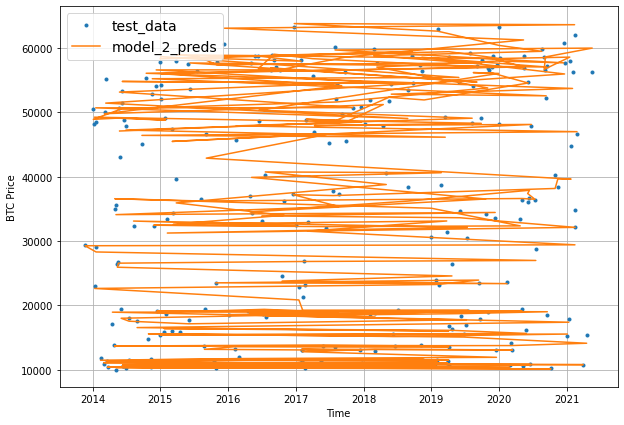

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

In [ ]:
HORIZON=7
WINDOW_SIZE=30

In [ ]:
full_windows,full_labels=make_windows(prices,
                                                window_size=WINDOW_SIZE,
                                                horizon=HORIZON)

Window indexes:
[[   0    1    2 ...   34   35   36]
 [   1    2    3 ...   35   36   37]
 [   2    3    4 ...   36   37   38]
 ...
 [2748 2749 2750 ... 2782 2783 2784]
 [2749 2750 2751 ... 2783 2784 2785]
 [2750 2751 2752 ... 2784 2785 2786]]


In [ ]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(windows=full_windows,
                                                                           labels=full_labels)

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
],name='model_3_dense')

In [ ]:
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
 model_3.fit(x=train_windows,
                       y=train_labels,
                       verbose=1,
                       epochs=100,
                       batch_size=128,
                       validation_data=(test_windows, test_labels),
                       callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 2s 76ms/step - loss: 1476.6801 - val_loss: 3088.5391
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 552.8872 - val_loss: 2462.5020
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 435.1955 - val_loss: 2282.7729
Epoch 4/100
18/18 [==============================] - 1s 32ms/step - loss: 391.9522 - val_loss: 1980.5011
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 357.7267 - val_loss: 1985.0293
Epoch 6/100
18/18 [==============================] - 1s 31ms/step - loss: 332.7856 - val_loss: 1754.1522
Epoch 7/100
18/18 [==============================] - 1s 47ms/step - loss: 309.8981 - val_loss: 1590.3005
Epoch 8/100
18/18 [==============================] - 1s 30ms/step - loss: 302.8700 - val_loss: 1565.3329
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 293.6388 - val_loss: 1611.2915
Epoch 10/100
18/18 [==============================] - 1s

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1322.7781


1322.778076171875

In [ ]:
model_3=tf.keras.models.load_model('/content/Model Experiments/model_3_dense')

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1228.1417


1228.1417236328125

In [ ]:
model_3_preds=make_preds(model=model_3,
                         input_data=test_windows)

In [ ]:
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_preds)

In [ ]:
model_3_preds.shape

TensorShape([551, 7])

In [ ]:
test_labels.shape

(551, 7)

In [ ]:
model_3_results

{'mae': array([  559.42004 ,   276.0053  ,   298.20258 ,   408.06152 ,
          431.32047 ,   526.28064 ,   542.41644 ,   459.79108 ,
          490.63736 ,   631.6582  ,   802.51654 ,   731.79333 ,
          684.06476 ,   789.71857 ,   563.4593  ,   271.9013  ,
          231.86858 ,   258.64767 ,   277.65277 ,   291.5478  ,
          105.425575,   132.63156 ,   205.97643 ,   262.20816 ,
          169.8651  ,   165.05127 ,   110.21959 ,    83.64655 ,
          115.86182 ,   152.87025 ,   279.98862 ,   380.96127 ,
          280.21414 ,   271.9101  ,   264.43088 ,   261.91315 ,
          330.29108 ,   242.21861 ,   253.72746 ,   245.38596 ,
          412.562   ,   128.63539 ,    88.56452 ,    92.15639 ,
          100.39704 ,   102.41455 ,    74.52804 ,    94.00349 ,
           84.86837 ,    76.64781 ,   108.49679 ,   144.869   ,
          187.69133 ,   162.5261  ,   265.83133 ,   391.21323 ,
          552.2943  ,   541.77313 ,   522.20886 ,   523.98157 ,
          430.13052 ,   276.80893

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_preds)

In [ ]:
model_3_results

{'mae': 1228.1416,
 'mse': 5323686.5,
 'rmse': 1412.9114,
 'mape': 5.4698334,
 'mase': 2.1854093}

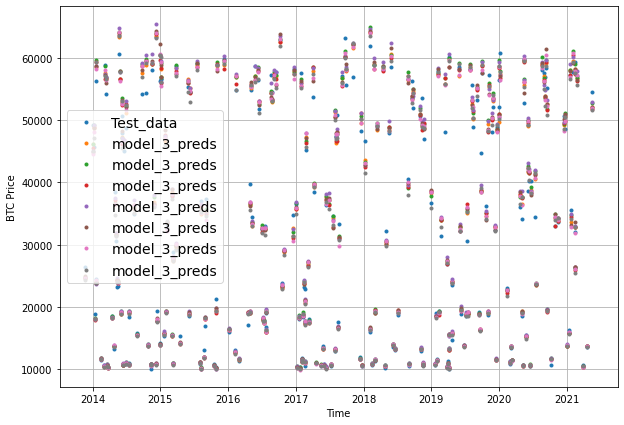

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9233.328 , 9332.702 , 9363.651 , 9442.775 , 9401.978 , 9414.001 ,
        9280.01  ],
       [8911.084 , 9065.984 , 9113.08  , 9026.601 , 8990.093 , 9000.148 ,
        9053.433 ],
       [8848.506 , 9018.2295, 9006.146 , 8934.578 , 8929.888 , 8856.351 ,
        8958.367 ],
       [9048.449 , 9058.819 , 8966.749 , 9127.248 , 8982.123 , 9056.629 ,
        9002.575 ],
       [8958.309 , 9008.146 , 8827.891 , 8995.736 , 9129.433 , 9099.142 ,
        8881.021 ]], dtype=float32)>

In [ ]:
tf.reduce_mean(model_3_preds,axis=1).shape

TensorShape([551])

In [ ]:
tf.reduce_mean(model_3_preds,axis=0).shape

TensorShape([7])

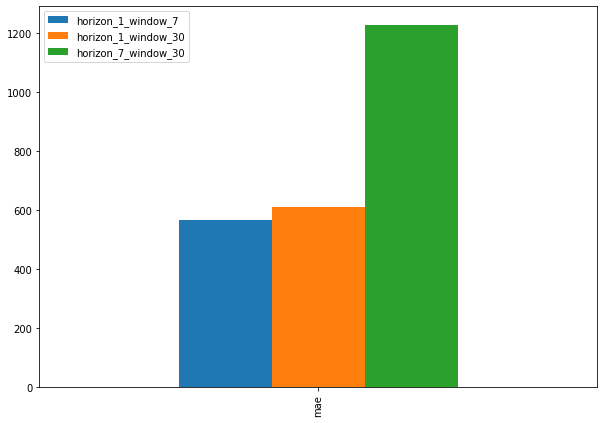

In [ ]:
pd.DataFrame({ 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
full_windows,full_labels=make_windows( prices,window_size=WINDOW_SIZE, horizon=HORIZON)

Window indexes:
[[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [2777 2778 2779 ... 2782 2783 2784]
 [2778 2779 2780 ... 2783 2784 2785]
 [2779 2780 2781 ... 2784 2785 2786]]


In [ ]:
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(30,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
       126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
       152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
       180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ])>

In [ ]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)

In [ ]:
len(train_windows),len(train_labels)

(2224, 2224)

In [ ]:
expand_dims_layer=tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [ ]:
print(f'The shape ox x before: {x.shape}')
print(f'The shape after expansion: {expand_dims_layer(x).shape}')
print(f'The values of dimension increase:\n{expand_dims_layer(x)}')

The shape ox x before: (30,)
The shape after expansion: (30, 1)
The values of dimension increase:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]
 [123.033  ]
 [124.049  ]
 [125.96116]
 [125.27966]
 [125.9275 ]
 [126.38333]
 [135.24199]
 [133.20332]
 [142.76334]
 [137.92332]
 [142.95166]
 [152.55183]
 [160.33884]
 [164.31499]
 [177.63333]
 [188.29716]
 [200.70166]
 [180.355  ]
 [175.03166]
 [177.6965 ]
 [187.15984]
 [192.75665]
 [197.4    ]]


In [ ]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
  tf.keras.layers.Conv1D(filters=128,kernel_size=7,padding='causal',activation='relu'),
  tf.keras.layers.Dense(HORIZON)  
],name='model_4_Conv1D')

In [ ]:
model_4.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows,test_labels),
            callbacks=create_model_checkpoint(model_name=model_4.name))

Epoch 1/100
18/18 [==============================] - 1s 52ms/step - loss: 1486.8625 - val_loss: 1494.0219
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 359.4608 - val_loss: 1882.3615
Epoch 3/100
18/18 [==============================] - 1s 45ms/step - loss: 237.6436 - val_loss: 1228.3146
Epoch 4/100
18/18 [==============================] - 1s 45ms/step - loss: 208.6003 - val_loss: 1095.6528
Epoch 5/100
18/18 [==============================] - 1s 44ms/step - loss: 197.1489 - val_loss: 1088.0098
Epoch 6/100
18/18 [==============================] - 1s 43ms/step - loss: 192.2837 - val_loss: 1075.7446
Epoch 7/100
18/18 [==============================] - 1s 42ms/step - loss: 191.2738 - val_loss: 1050.4635
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 186.0934 - val_loss: 1054.7946
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 183.6488 - val_loss: 1061.1055
Epoch 10/100
18/18 [==============================] - 1s 

In [ ]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_8 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 609.9927


609.99267578125

In [ ]:
model_4=tf.keras.models.load_model('/content/Model Experiments/model_4_Conv1D')

In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.3994


570.3993530273438

In [ ]:
model_4_preds=make_preds(model=model_4,
                         input_data=test_windows)

In [ ]:
model_4_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_4_preds)

In [ ]:
model_4_results

{'mae': 570.39935,
 'mse': 1182763.1,
 'rmse': 1087.5492,
 'mape': 2.5455725,
 'mase': 1.0020337}

In [ ]:
inputs=tf.keras.layers.Input(shape=(WINDOW_SIZE))
x=tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=1))(inputs)
x=tf.keras.layers.LSTM(128,activation='relu')(x)
output=tf.keras.layers.Dense(HORIZON)(x)
model_5=tf.keras.Model(inputs,output,name='model_5_lstm')

In [ ]:
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_5.fit(train_windows,
           train_labels,
           batch_size=128,
           epochs=100,
           validation_data=(test_windows,test_labels),
           callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 2369.6047

18/18 [==============================] - 4s 160ms/step - loss: 2335.3174 - val_loss: 9880.3252
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 807.0424 

18/18 [==============================] - 2s 127ms/step - loss: 807.0424 - val_loss: 1118.6356
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 253.9129 - val_loss: 1281.7865
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 203.8624

18/18 [==============================] - 2s 123ms/step - loss: 203.8624 - val_loss: 1079.5038
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 191.2979

18/18 [==============================] - 2s 122ms/step - loss: 191.2979 - val_loss: 1068.3971
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 189.1799

18/18 [==============================] - 3s 147ms/step - loss: 191.5461 - val_loss: 1056.6617
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 187.4207 - val_loss: 1066.2421
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 184.6467 - val_loss: 1061.5973
Epoch 9/100
10/18 [===============>..............] - ETA: 0s - loss: 178.5386

18/18 [==============================] - 2s 124ms/step - loss: 182.6696 - val_loss: 1048.7300
Epoch 10/100
10/18 [===============>..............] - ETA: 0s - loss: 176.3729

18/18 [==============================] - 2s 122ms/step - loss: 181.6110 - val_loss: 1029.8955
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 181.2781

18/18 [==============================] - 2s 145ms/step - loss: 181.2781 - val_loss: 1029.7865
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 179.8507

18/18 [==============================] - 2s 125ms/step - loss: 179.8507 - val_loss: 1015.4153
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 175.4457

18/18 [==============================] - 2s 125ms/step - loss: 177.4957 - val_loss: 1003.1665
Epoch 14/100
18/18 [==============================] - 0s 9ms/step - loss: 175.8761 - val_loss: 1024.5356
Epoch 15/100
18/18 [==============================] - 0s 8ms/step - loss: 175.3559 - val_loss: 1008.2161
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 173.2439

18/18 [==============================] - 2s 123ms/step - loss: 173.2439 - val_loss: 966.6472
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 171.8057 - val_loss: 1028.2811
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 170.7998 - val_loss: 1023.2687
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 169.2529 - val_loss: 1023.2548
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 168.7918

18/18 [==============================] - 3s 151ms/step - loss: 168.7918 - val_loss: 942.4553
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 165.1443

18/18 [==============================] - 2s 126ms/step - loss: 165.1443 - val_loss: 935.9705
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 164.4887

18/18 [==============================] - 2s 131ms/step - loss: 163.5978 - val_loss: 935.0843
Epoch 23/100
18/18 [==============================] - 0s 8ms/step - loss: 162.8251 - val_loss: 948.4741
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 161.7509

18/18 [==============================] - 2s 122ms/step - loss: 160.1138 - val_loss: 926.3364
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 158.8024

18/18 [==============================] - 3s 147ms/step - loss: 158.8024 - val_loss: 892.9935
Epoch 26/100
10/18 [===============>..............] - ETA: 0s - loss: 161.8581

18/18 [==============================] - 2s 122ms/step - loss: 156.7180 - val_loss: 891.3795
Epoch 27/100
18/18 [==============================] - 0s 8ms/step - loss: 155.5457 - val_loss: 895.8901
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 154.9996

18/18 [==============================] - 2s 121ms/step - loss: 154.9996 - val_loss: 856.6888
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 152.5824 - val_loss: 867.5688
Epoch 30/100
18/18 [==============================] - 0s 8ms/step - loss: 151.7613 - val_loss: 865.5002
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 149.3167

18/18 [==============================] - 2s 141ms/step - loss: 149.2199 - val_loss: 836.3096
Epoch 32/100
18/18 [==============================] - 0s 13ms/step - loss: 148.3449 - val_loss: 842.1774
Epoch 33/100
18/18 [==============================] - 0s 16ms/step - loss: 146.6768 - val_loss: 869.1637
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 145.6004

18/18 [==============================] - 3s 167ms/step - loss: 146.0500 - val_loss: 801.7148
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 143.3617 - val_loss: 820.6805
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 144.0304

18/18 [==============================] - 2s 124ms/step - loss: 144.0304 - val_loss: 790.3161
Epoch 37/100
18/18 [==============================] - 0s 9ms/step - loss: 142.4782 - val_loss: 824.2859
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 141.8158

18/18 [==============================] - 2s 125ms/step - loss: 141.0479 - val_loss: 771.2401
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 139.1631

18/18 [==============================] - 2s 125ms/step - loss: 139.1631 - val_loss: 765.6126
Epoch 40/100
18/18 [==============================] - 0s 9ms/step - loss: 138.6901 - val_loss: 770.7336
Epoch 41/100
10/18 [===============>..............] - ETA: 0s - loss: 142.2093

18/18 [==============================] - 3s 149ms/step - loss: 135.9634 - val_loss: 754.3376
Epoch 42/100
10/18 [===============>..............] - ETA: 0s - loss: 131.2504

18/18 [==============================] - 2s 123ms/step - loss: 134.9260 - val_loss: 753.1067
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 134.1011 - val_loss: 753.1152
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 133.2156

18/18 [==============================] - 2s 125ms/step - loss: 132.1861 - val_loss: 733.4183
Epoch 45/100
10/18 [===============>..............] - ETA: 0s - loss: 133.6351

18/18 [==============================] - 2s 122ms/step - loss: 131.1952 - val_loss: 727.6313
Epoch 46/100
18/18 [==============================] - 0s 8ms/step - loss: 131.6666 - val_loss: 750.4373
Epoch 47/100
10/18 [===============>..............] - ETA: 0s - loss: 121.1534

18/18 [==============================] - 3s 147ms/step - loss: 130.8690 - val_loss: 720.7404
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 129.3127 - val_loss: 735.0362
Epoch 49/100
18/18 [==============================] - ETA: 0s - loss: 128.2609

18/18 [==============================] - 2s 127ms/step - loss: 128.2609 - val_loss: 715.4185
Epoch 50/100
18/18 [==============================] - 0s 9ms/step - loss: 130.4467 - val_loss: 721.3588
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 130.2654 - val_loss: 805.9873
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 134.5000

18/18 [==============================] - 2s 128ms/step - loss: 134.3183 - val_loss: 693.5599
Epoch 53/100
18/18 [==============================] - ETA: 0s - loss: 128.2155

18/18 [==============================] - 2s 123ms/step - loss: 128.2155 - val_loss: 687.9921
Epoch 54/100
18/18 [==============================] - 0s 9ms/step - loss: 126.1641 - val_loss: 692.0089
Epoch 55/100
10/18 [===============>..............] - ETA: 0s - loss: 132.1535

18/18 [==============================] - 3s 168ms/step - loss: 123.9003 - val_loss: 686.3478
Epoch 56/100
16/18 [=========================>....] - ETA: 0s - loss: 126.0999

18/18 [==============================] - 3s 148ms/step - loss: 125.4486 - val_loss: 683.1085
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 124.6559 - val_loss: 686.7340
Epoch 58/100
17/18 [===========================>..] - ETA: 0s - loss: 121.4596

18/18 [==============================] - 2s 124ms/step - loss: 121.6535 - val_loss: 667.7805
Epoch 59/100
10/18 [===============>..............] - ETA: 0s - loss: 117.8529

18/18 [==============================] - 2s 145ms/step - loss: 120.9074 - val_loss: 663.2317
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 121.7943 - val_loss: 669.8152
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 121.7152 - val_loss: 709.9424
Epoch 62/100
18/18 [==============================] - 0s 9ms/step - loss: 124.1658 - val_loss: 731.7162
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 124.5222

18/18 [==============================] - 2s 130ms/step - loss: 124.5222 - val_loss: 661.2121
Epoch 64/100
10/18 [===============>..............] - ETA: 0s - loss: 126.3634

18/18 [==============================] - 2s 123ms/step - loss: 118.8210 - val_loss: 657.9820
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 118.6892

18/18 [==============================] - 2s 123ms/step - loss: 118.6892 - val_loss: 645.0436
Epoch 66/100
18/18 [==============================] - 0s 9ms/step - loss: 118.2965 - val_loss: 662.7259
Epoch 67/100
18/18 [==============================] - ETA: 0s - loss: 118.1414

18/18 [==============================] - 3s 150ms/step - loss: 118.1414 - val_loss: 639.8839
Epoch 68/100
17/18 [===========================>..] - ETA: 0s - loss: 119.6631

18/18 [==============================] - 2s 123ms/step - loss: 118.9358 - val_loss: 639.7149
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 120.5472 - val_loss: 641.8163
Epoch 70/100
10/18 [===============>..............] - ETA: 0s - loss: 119.0310

18/18 [==============================] - 2s 124ms/step - loss: 118.2116 - val_loss: 632.9008
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 117.2448 - val_loss: 673.5145
Epoch 72/100
18/18 [==============================] - 0s 8ms/step - loss: 119.4650 - val_loss: 644.5153
Epoch 73/100
10/18 [===============>..............] - ETA: 0s - loss: 121.2234

18/18 [==============================] - 2s 122ms/step - loss: 117.5314 - val_loss: 628.1414
Epoch 74/100
18/18 [==============================] - 0s 8ms/step - loss: 116.6949 - val_loss: 644.1141
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 116.6269 - val_loss: 651.7940
Epoch 76/100
10/18 [===============>..............] - ETA: 0s - loss: 118.3771

18/18 [==============================] - 3s 149ms/step - loss: 116.1461 - val_loss: 621.3867
Epoch 77/100
18/18 [==============================] - 0s 8ms/step - loss: 114.7361 - val_loss: 654.2639
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 117.0369 - val_loss: 652.3751
Epoch 79/100
18/18 [==============================] - ETA: 0s - loss: 115.7280

18/18 [==============================] - 2s 126ms/step - loss: 115.7280 - val_loss: 616.6404
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 113.9225 - val_loss: 628.5073
Epoch 81/100
18/18 [==============================] - 0s 8ms/step - loss: 114.4534 - val_loss: 654.1747
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 117.0681

18/18 [==============================] - 2s 125ms/step - loss: 117.0681 - val_loss: 615.4617
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 114.7673 - val_loss: 650.9741
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 115.0341 - val_loss: 625.5688
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 115.0244 - val_loss: 628.2572
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 116.1915 - val_loss: 616.0583
Epoch 87/100
16/18 [=========================>....] - ETA: 0s - loss: 114.0349

18/18 [==============================] - 2s 121ms/step - loss: 113.9564 - val_loss: 606.0414
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 112.4646 - val_loss: 613.3262
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 112.1291 - val_loss: 623.4943
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 117.1080 - val_loss: 637.0333
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 116.6392 - val_loss: 653.0419
Epoch 92/100
18/18 [==============================] - ETA: 0s - loss: 112.9769

18/18 [==============================] - 3s 151ms/step - loss: 112.9769 - val_loss: 600.9940
Epoch 93/100
18/18 [==============================] - 0s 9ms/step - loss: 113.4687 - val_loss: 602.8214
Epoch 94/100
17/18 [===========================>..] - ETA: 0s - loss: 112.1238

18/18 [==============================] - 2s 124ms/step - loss: 111.4398 - val_loss: 600.6846
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7372 - val_loss: 605.2798
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 113.4551 - val_loss: 622.2026
Epoch 97/100
18/18 [==============================] - 0s 8ms/step - loss: 117.7527 - val_loss: 657.8603
Epoch 98/100
17/18 [===========================>..] - ETA: 0s - loss: 116.2789

18/18 [==============================] - 2s 124ms/step - loss: 115.5103 - val_loss: 596.4363
Epoch 99/100
17/18 [===========================>..] - ETA: 0s - loss: 113.1361

18/18 [==============================] - 2s 125ms/step - loss: 112.6184 - val_loss: 595.2736
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 116.2064 - val_loss: 618.7366


In [ ]:
model_5=tf.keras.models.load_model('/content/Model Experiments/model_5_lstm')

In [ ]:
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 595.2737


595.273681640625

In [ ]:
model_5_preds=make_preds(model=model_5,
                         input_data=test_windows)

In [ ]:
model_5_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_5_preds)

In [ ]:
model_5_results

{'mae': 595.27374,
 'mse': 1260722.0,
 'rmse': 1122.8187,
 'mape': 2.6663384,
 'mase': 1.0457311}

In [ ]:
block_reward_1=50
block_reward_2=25
block_reward_3=12.5
block_reward_4=6.25

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
block_reward_2_datetime=np.datetime64('2012-11-28')
block_reward_3_datetime=np.datetime64('2016-07-09')
block_reward_4_datetime=np.datetime64('2020-05-18')

In [ ]:
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_2_days

1012

In [ ]:
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_3_days

2421

In [ ]:
bitcoin_prices_block=bitcoin_prices.copy()

In [ ]:
bitcoin_prices_block['block_reward']=None

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3

In [ ]:
bitcoin_prices_block.sample(5)

,Price,block_reward
Date,,
2017-08-23,4162.792490,12.5
2020-11-27,17187.406276,None
2018-12-18,3478.461203,12.5
2019-09-16,10302.190714,12.5
2017-09-25,3753.435000,12.5


In [ ]:
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4

In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


In [ ]:
from sklearn.preprocessing import minmax_scale

In [ ]:
scaled_bitcoin_prices_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price','block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

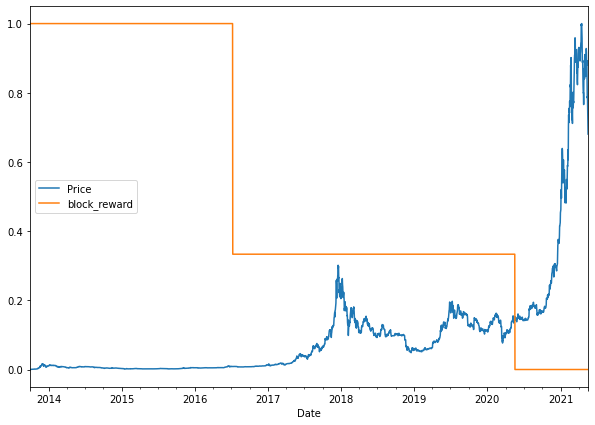

In [ ]:
scaled_bitcoin_prices_df.plot(figsize=(10,7));

In [ ]:
bitcoin_prices_windowed=bitcoin_prices_block.copy()

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X=bitcoin_prices_windowed.dropna().drop('Price',axis=1).astype(np.float32)

In [ ]:
y=bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
split_size=int(0.8*len(X))

In [ ]:
split_size

2224

In [ ]:
X_train,y_train=X[:split_size],y[:split_size]

In [ ]:
X_test,y_test=X[split_size:],y[split_size:]

In [ ]:
model_6=tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(HORIZON, activation='linear')
], name='model_6_dense')

In [ ]:
model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
model_6.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name='model_6')])

Epoch 1/100
18/18 [==============================] - 1s 36ms/step - loss: 1734.6301 - val_loss: 1271.0803
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 359.9563 - val_loss: 1836.8264
Epoch 3/100
18/18 [==============================] - 1s 33ms/step - loss: 222.5266 - val_loss: 1215.1627
Epoch 4/100
18/18 [==============================] - 1s 30ms/step - loss: 184.8823 - val_loss: 1058.5464
Epoch 5/100
18/18 [==============================] - 0s 29ms/step - loss: 178.1195 - val_loss: 995.0316
Epoch 6/100
18/18 [==============================] - 1s 30ms/step - loss: 174.5970 - val_loss: 990.7955
Epoch 7/100
18/18 [==============================] - 1s 29ms/step - loss: 166.2847 - val_loss: 924.9222
Epoch 8/100
18/18 [==============================] - 1s 30ms/step - loss: 160.0867 - val_loss: 874.6093
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 156.0360 - val_loss: 895.1741
Epoch 10/100
18/18 [==============================] - 1s 31ms

In [ ]:
model_6=tf.keras.models.load_model('/content/Model Experiments/model_6')

In [ ]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 1ms/step - loss: 565.9974


565.9974365234375

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8835.871, 8759.175, 9022.037, 8777.602, 8726.929, 8718.379,
       8675.467, 8520.342, 8437.201, 8522.035], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 565.9975,
 'mse': 1164484.4,
 'rmse': 1079.1128,
 'mape': 2.540583,
 'mase': 0.99430084}

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
HORIZON

1

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960147  0.32512042 -0.8428684  -0.6938984  -0.31720543 -0.56987345
 -0.6396661 ]
Forecast: 1.0071649551391602


In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
bitcoin_prices_nbeats=bitcoin_prices.copy()

In [ ]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price+{i+1}']=bitcoin_prices_nbeats['Price'].shift(periods=i+1)

In [ ]:
bitcoin_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X=bitcoin_prices_nbeats.dropna().drop('Price',axis=1)
y=bitcoin_prices_nbeats.dropna()['Price']

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
train_features_dataset=tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)

In [ ]:
train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

In [ ]:
BATCH_SIZE=1024
train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
N_EPOCHS=5000
N_NEURONS=512
N_LAYERS=4
N_STACKS=30
INPUT_SIZE=WINDOW_SIZE*HORIZON
THETA_SIZE=WINDOW_SIZE+HORIZON

In [ ]:
%%time

nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name='InitialBlock')

CPU times: user 9.24 ms, sys: 0 ns, total: 9.24 ms
Wall time: 9.91 ms


In [ ]:
stack_input=tf.keras.layers.Input(shape=(INPUT_SIZE),name='stack_input')

In [ ]:
residuals,forecast=nbeats_block_layer(stack_input)

In [ ]:
for i,_ in enumerate(range(N_STACKS-1)):
  backcast,block_forecast=nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                                                        theta_size=THETA_SIZE,
                                                        horizon=HORIZON,
                                                        n_neurons=N_NEURONS,
                                                        n_layers=N_LAYERS,
                                                        name=f'NBeatsBlock_{i}')(residuals)
  residuals=tf.keras.layers.subtract([residuals,backcast],name=f'Subtract_{i}')
  forecast=tf.keras.layers.add([forecast,block_forecast],name=f'Add_{i}')

model_7=tf.keras.Model(inputs=stack_input,outputs=forecast,name='model_7_nbeats')
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

Epoch 1/5000
3/3 [==============================] - 18s 3s/step - loss: 3512.2864 - mae: 3512.2864 - mse: 33708096.0000 - val_loss: 221304.9531 - val_mae: 221304.9531 - val_mse: 86589571072.0000 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 8s 2s/step - loss: 7737.2563 - mae: 7737.2563 - mse: 114439616.0000 - val_loss: 1097.4851 - val_mae: 1097.4851 - val_mse: 3980077.5000 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 7s 2s/step - loss: 1017.4088 - mae: 1017.4088 - mse: 8403365.0000 - val_loss: 1527.6218 - val_mae: 1527.6218 - val_mse: 5678985.0000 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 7s 2s/step - loss: 812.5472 - mae: 812.5472 - mse: 1869214.3750 - val_loss: 2701.1721 - val_mae: 2701.1721 - val_mse: 15181675.0000 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 7s 2s/step - loss: 331.1131 - mae: 331.1131 - mse: 524481.1250 - val_loss: 6648.3467 - val_mae: 6648.3467 - val_mse: 83284496.0000 - lr: 0.0010
E

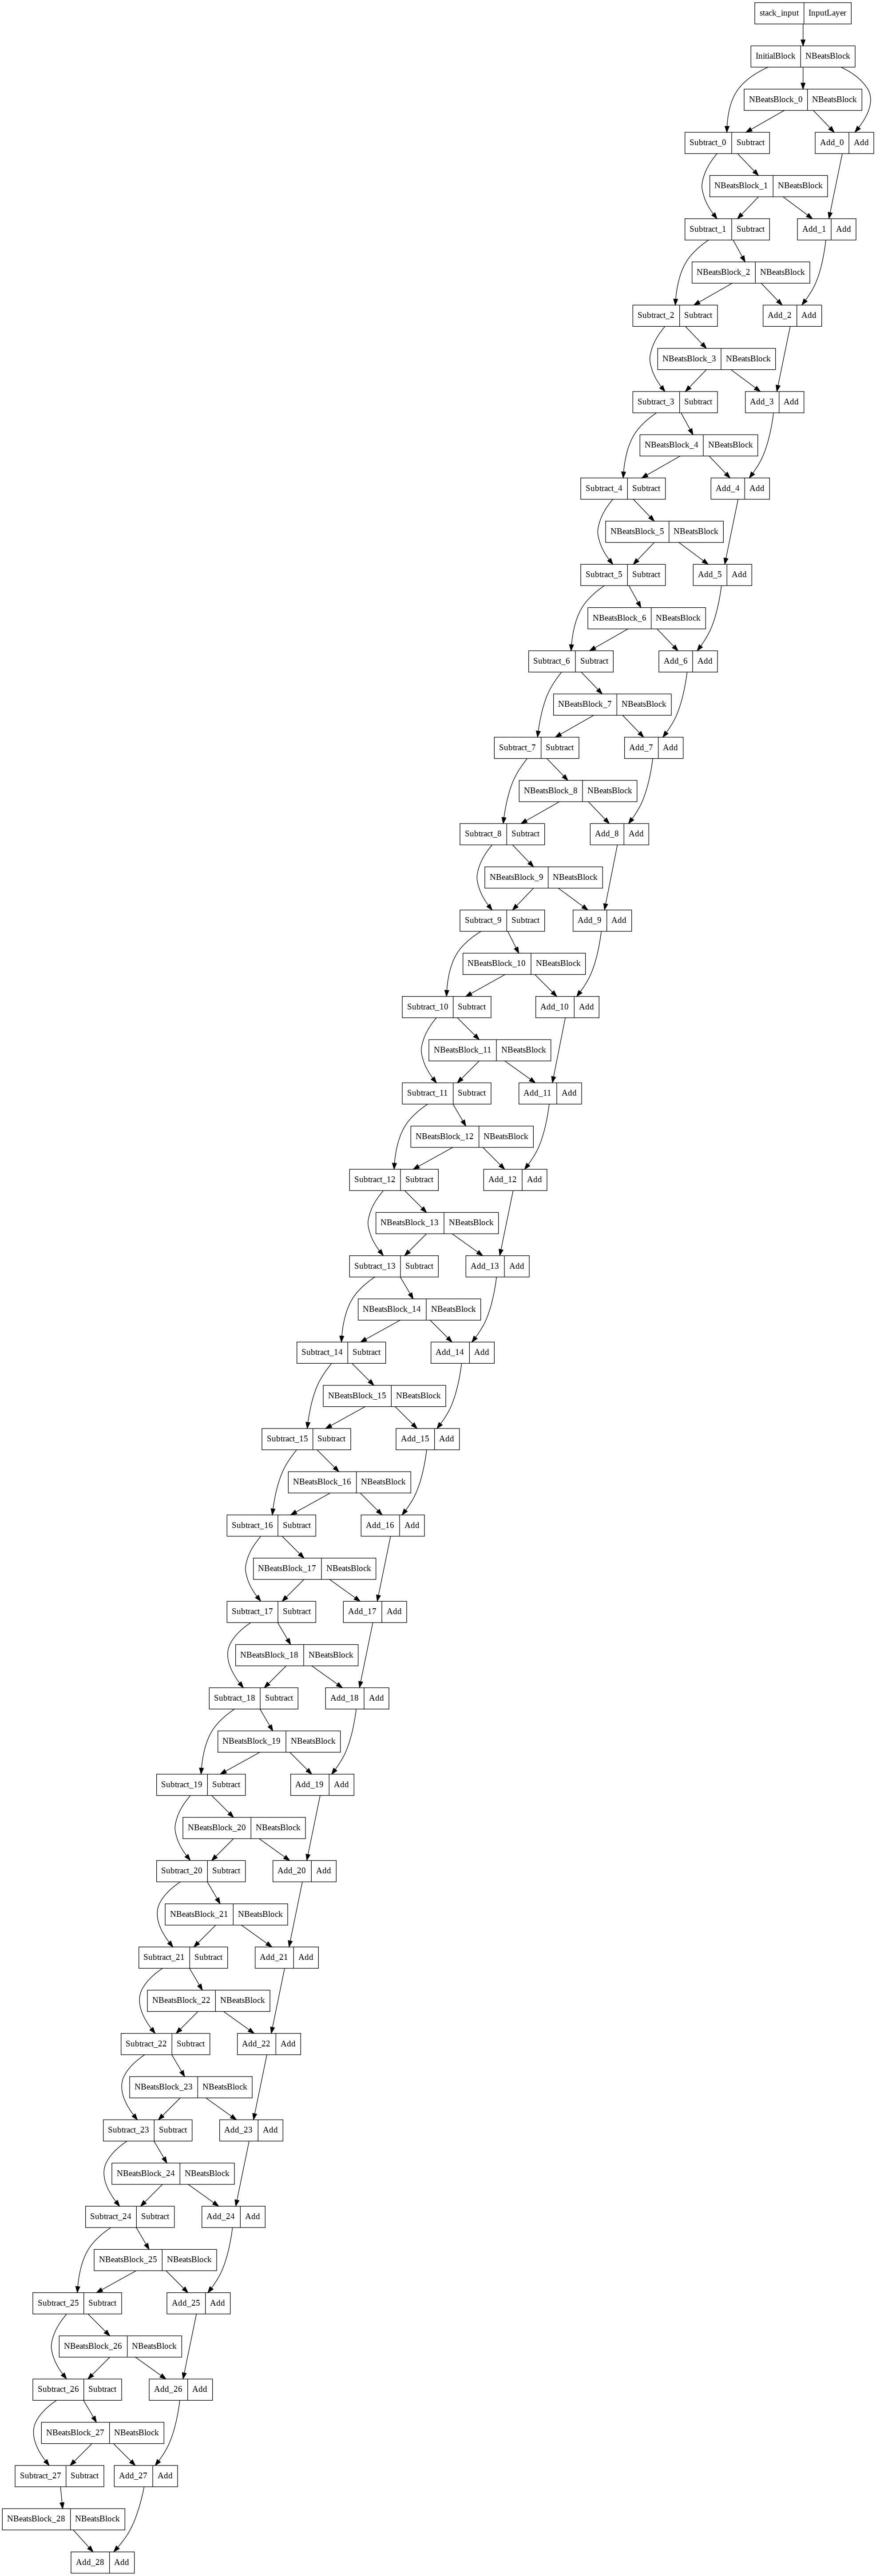

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)


In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8885.355, 8786.721, 9023.629, 8815.739, 8730.791, 8728.629,
       8683.78 , 8535.62 , 8456.898, 8519.091], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 580.5279,
 'mse': 1199605.2,
 'rmse': 1095.2649,
 'mape': 2.631262,
 'mase': 1.0198268}

In [ ]:
tf.random.set_seed(42)
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=['mae','mse','mape']):
  ensemble_models=[]
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f'Optimizing model by reducing:{loss_function} for {num_epochs} epochs, model_number:{i}')

      model=tf.keras.Sequential([
          tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
          tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
          tf.keras.layers.Dense(HORIZON,activation='relu')
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model)
  
  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

In [ ]:
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds=[]
  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

In [ ]:
ensemble_preds.shape

In [ ]:
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper


In [ ]:
lower, upper = get_upper_lower(preds=ensemble_preds)

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [ ]:
X_all=bitcoin_prices_windowed.dropna().drop(['Price','Block Reward'],axis=1).to_numpy()
y_all=bitcoin_prices_windowed.dropna()['Price']

In [ ]:
features_dataset_all=tf.Data.dataset.from_tensor_slices(X_all)
labels_dataset_all=tf.Data.dataset.from_tensor_slices(y_all)

In [ ]:
dataset_all=tf.Data.datset.zip((features_dataset_all,labels_dataset_all))

In [ ]:
BATCH_SIZE=1024
dataset_all=dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)